In [1]:
import torch

In [2]:
import pandas as pd

In [3]:
import langdetect
from langdetect import DetectorFactory, detect, detect_langs

In [4]:
from langchain.callbacks.manager import CallbackManager
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler

In [5]:
from langchain.docstore.document import Document
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import Chroma
from langchain.chains import ConversationalRetrievalChain
from langchain.memory import ConversationBufferMemory
from langchain.prompts import PromptTemplate

In [6]:
from langchain.embeddings import HuggingFaceEmbeddings

In [7]:
from langchain import HuggingFacePipeline
from langchain.chains import RetrievalQA

In [8]:
import myloadlib
from myloadlib import loadDir, loadFile, loadWiki, loadYoutube, readAPI

In [9]:
import importlib
importlib.reload(myloadlib)

<module 'myloadlib' from '/Users/owaisdashti/Software2425/exams/AI_Exam/GenAI/myloadlib.py'>

In [10]:
documents = []

# Loading Webpage

In [11]:
from langchain.document_loaders import WebBaseLoader

In [12]:
# Load Webpage
def loadWeb(url):
    loader = WebBaseLoader(url)
    docs = loader.load()
    return docs

In [13]:
def loadManyWebs(urls):
    all_docs = []
    for url in urls:
        loader = WebBaseLoader(url)
        docs = loader.load()
        all_docs.extend(docs)
    return all_docs

In [14]:
urls = ['https://www.boligsiden.dk/adresse/niels-bohrs-vej-35a-8260-viby-j-07515829_35a_______?udbud=921aad54-6713-4809-ab12-ed4125ea0b39',
        'https://www.boligsiden.dk/adresse/tousvej-18-8230-aabyhoej-07518710__18_______?udbud=6a9d2e48-3f03-4b3e-a786-6870b1422c6a',
        'https://www.boligsiden.dk/adresse/solbakken-6-8450-hammel-07100941___6_______?udbud=f40b5be4-67fb-4298-a9cb-ed0be40a23da',
        'https://www.boligsiden.dk/adresse/markedsgade-4-9760-vraa-08602201___4_______?udbud=239de4f1-abaf-40e9-a8b1-53e3f8cf71c1',
        'https://www.boligsiden.dk/adresse/kongensbrovej-21-8881-thorsoe-07100537__21_______?udbud=7c0b1160-b42e-4f1e-86f8-fd21a9881bb2',
        'https://www.boligsiden.dk/adresse/blichersvej-7-8620-kjellerup-07400128___7_______?udbud=feb28f55-181c-4f51-bc07-9d99fef4d00b',
        'https://www.boligsiden.dk/adresse/gurrevej-407a-3490-kvistgaard-02172600407a_______?udbud=dd9dbef5-cbb6-4692-89c9-2edf7e4a13df',
       'https://www.dingeo.dk/adresse/3000-helsing%C3%B8r/nordre%20strandvej-72a/','https://www.dingeo.dk/adresse/3000-helsing%C3%B8r/sophie%20brahes%20gade-3a/1-tv/',
        'https://www.dingeo.dk/adresse/3000-helsing%C3%B8r/allegade-10d/st-tv/','https://www.dingeo.dk/adresse/3000-helsing%C3%B8r/esrumvej-105/',
        'https://www.dingeo.dk/adresse/3000-helsing%C3%B8r/gefionsvej-52/', 'https://www.dingeo.dk/adresse/3000-helsing%C3%B8r/torvegade-1c/1-th/', 
        'https://www.dingeo.dk/adresse/3000-helsing%C3%B8r/glentevej-23/', 'https://www.dingeo.dk/adresse/3000-helsing%C3%B8r/kristineh%C3%B8jvej-23/'
       ]

In [15]:
docs = loadManyWebs(urls)

In [16]:
documents.extend(docs)

In [17]:
len(documents)

15

In [18]:
documents[0].page_content[:500]

'Til salg: Niels Bohrs Vej 35A, Viby J - Villa på 205 m² - BoligsidenOpen main menuSøg boligBoliger til salg og lejeBoliger til salgLejeboligerTvangsauktionerLandbrugVærktøjer og guidesStatistik på priser og liggetidPriser på solgte boligerGuides til boligkøbFakta om alle boliger i DanmarkSe ejendomsvurderinger på kortFind mæglerHjælp til boligsalgFind mægler og se nøgletalStatistik på priser og liggetidSe priser på solgte boligerGuidesVælg den rigtige ejendomsmæglerGuides til boligsalgGør din bo'

In [19]:
documents[0].metadata

{'source': 'https://www.boligsiden.dk/adresse/niels-bohrs-vej-35a-8260-viby-j-07515829_35a_______?udbud=921aad54-6713-4809-ab12-ed4125ea0b39',
 'title': 'Til salg: Niels Bohrs Vej 35A, Viby J - Villa på 205 m² - Boligsiden',
 'description': 'Niels Bohrs Vej 35A, 8260 Viby J. Ekstraordinær Funkisvilla i Fysikerkvarteret, Kongsvang\nDrømmer du om at bo i en moderne, lavenergivindende bolig m',
 'language': 'da'}

# Transforming text to prepare if for AI processing.

In [20]:
import myutils
from myutils import chunkDocs, langDetect, wordCloud 

In [21]:
importlib.reload(myutils)

<module 'myutils' from '/Users/owaisdashti/Software2425/exams/AI_Exam/GenAI/myutils.py'>

In [22]:
splits = myutils.chunkDocs(documents, 350)  
splits

[Document(page_content='Til salg: Niels Bohrs Vej 35A, Viby J - Villa på 205 m² - BoligsidenOpen main menuSøg boligBoliger til salg og lejeBoliger til salgLejeboligerTvangsauktionerLandbrugVærktøjer og guidesStatistik på priser og liggetidPriser på solgte boligerGuides til boligkøbFakta om alle boliger i DanmarkSe ejendomsvurderinger på kortFind mæglerHjælp til', metadata={'source': 'https://www.boligsiden.dk/adresse/niels-bohrs-vej-35a-8260-viby-j-07515829_35a_______?udbud=921aad54-6713-4809-ab12-ed4125ea0b39', 'title': 'Til salg: Niels Bohrs Vej 35A, Viby J - Villa på 205 m² - Boligsiden', 'description': 'Niels Bohrs Vej 35A, 8260 Viby J. Ekstraordinær Funkisvilla i Fysikerkvarteret, Kongsvang\nDrømmer du om at bo i en moderne, lavenergivindende bolig m', 'language': 'da'}),
 Document(page_content='boligsalgFind mægler og se nøgletalStatistik på priser og liggetidSe priser på solgte boligerGuidesVælg den rigtige ejendomsmæglerGuides til boligsalgGør din bolig salgsklarBoligstatistikN

In [23]:
len(splits)

81

In [24]:
splits[70]

Document(page_content='Helsingør Kommune. Kommuneskatten er på 25,52% og grundskyldspromillen på 28,5‰.Udforsk KvistgårdSkoler i Kvistgård tæt på boligenFolkeskolerPrivatskolerNavnTrivselKaraktergennemsnitAfstandBoligen er sat til salg hosdanbolig HelsingørKongensgade 2, st., 3000 HelsingørTelefon: 49 26 11 00E-mail: helsingoer@danbolig.dkheart-oGem boligSe hos', metadata={'source': 'https://www.boligsiden.dk/adresse/gurrevej-407a-3490-kvistgaard-02172600407a_______?udbud=dd9dbef5-cbb6-4692-89c9-2edf7e4a13df', 'title': 'Til salg: Gurrevej 407A, Gurre, Kvistgård - Villa på 152 m² - Boligsiden', 'description': 'Gurrevej 407A, Gurre, 3490 Kvistgård. Beliggende i smukke omgivelse med udsigt over åbne marker og Gurre Slotsruin, har vi netop fået denne landlige ejen', 'language': 'da'})

In [25]:
df = pd.DataFrame(splits, columns=['page_content', 'metadata', 'type'])
df.sample(5)

page_content  \
41  (page_content, Til salg: Kongensbrovej 21, Aid...   
25  (page_content, udviklingBoligens tidslinje8. j...   
14  (page_content, udsigt!En unik udsigtsvilla i t...   
65  (page_content, KvistgårdEnergimærke CVillaSe 5...   
59  (page_content, om boligenOmrådetDer er 97.358 ...   

                                             metadata              type  
41  (metadata, {'source': 'https://www.boligsiden....  (type, Document)  
25  (metadata, {'source': 'https://www.boligsiden....  (type, Document)  
14  (metadata, {'source': 'https://www.boligsiden....  (type, Document)  
65  (metadata, {'source': 'https://www.boligsiden....  (type, Document)  
59  (metadata, {'source': 'https://www.boligsiden....  (type, Document)

In [26]:
df['page_content'][0]

('page_content',
 'Til salg: Niels Bohrs Vej 35A, Viby J - Villa på 205 m² - BoligsidenOpen main menuSøg boligBoliger til salg og lejeBoliger til salgLejeboligerTvangsauktionerLandbrugVærktøjer og guidesStatistik på priser og liggetidPriser på solgte boligerGuides til boligkøbFakta om alle boliger i DanmarkSe ejendomsvurderinger på kortFind mæglerHjælp til')

In [27]:
df['metadata'][0]

('metadata',
 {'source': 'https://www.boligsiden.dk/adresse/niels-bohrs-vej-35a-8260-viby-j-07515829_35a_______?udbud=921aad54-6713-4809-ab12-ed4125ea0b39',
  'title': 'Til salg: Niels Bohrs Vej 35A, Viby J - Villa på 205 m² - Boligsiden',
  'description': 'Niels Bohrs Vej 35A, 8260 Viby J. Ekstraordinær Funkisvilla i Fysikerkvarteret, Kongsvang\nDrømmer du om at bo i en moderne, lavenergivindende bolig m',
  'language': 'da'})

In [28]:
im, longstring = myutils.wordCloud(df, 'page_content')

Loading model: en_core_web_md


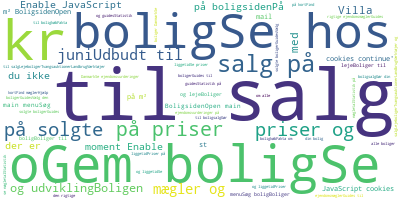

In [29]:
im

# Store documents in vector database

In [30]:
model_name = "sentence-transformers/all-mpnet-base-v2"
model_kwargs = {'device': 'cpu'}
encode_kwargs = {'normalize_embeddings': False}

In [31]:
embeddings = HuggingFaceEmbeddings(
    model_name=model_name,
    model_kwargs=model_kwargs,
    encode_kwargs=encode_kwargs
)

/opt/homebrew/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [32]:
persist_directory = '../data/chroma/'

vectordb = Chroma.from_documents(
    documents=splits,
    embedding=embeddings,
    persist_directory=persist_directory
)
vectordb.persist()

In [33]:
vectordb._collection.count()

887

In [34]:
query = 'You are an expert programmer that writes simple, concise code and explanations. Create me a document in html format with the following information displayed in a nice way so that I can use it in a pdf-format and download it: a house of type "Villa" with price: "1000kr" and size: "78m2" with a describtion'

In [35]:
answer = vectordb.similarity_search(query, k=3)
answer

[Document(page_content='Villa fra EDCEriksensvej 176710 Esbjerg V3.500.000 kr.Villa - 5/4 rum, 164 m²Villa fra EDCEriksensvej 176710 Esbjerg V3.500.000 kr.Villa - 5/4 rum, 164 m²Nyhed260 visninger de seneste 24 timerÅbent', metadata={'description': 'Villa til salg hos EDC Gilbjerg & Madsen. Bestil en fremvisning af Villaen på Eriksensvej 17, 6710 allerede i dag. ', 'language': 'da', 'source': 'https://www.edc.dk/alle-boliger/villa/6710-esbjerg-v/eriksensvej-17/61802766/', 'title': 'Villa til salg - Eriksensvej 17 '}),
 Document(page_content='Villa fra EDCEriksensvej 176710 Esbjerg V3.500.000 kr.Villa - 5/4 rum, 164 m²Villa fra EDCEriksensvej 176710 Esbjerg V3.500.000 kr.Villa - 5/4 rum, 164 m²Nyhed260 visninger de seneste 24 timerÅbent', metadata={'description': 'Villa til salg hos EDC Gilbjerg & Madsen. Bestil en fremvisning af Villaen på Eriksensvej 17, 6710 allerede i dag. ', 'language': 'da', 'source': 'https://www.edc.dk/alle-boliger/villa/6710-esbjerg-v/eriksensvej-17/61802766/',

In [36]:
for d in answer:
    print(d.page_content)

Villa fra EDCEriksensvej 176710 Esbjerg V3.500.000 kr.Villa - 5/4 rum, 164 m²Villa fra EDCEriksensvej 176710 Esbjerg V3.500.000 kr.Villa - 5/4 rum, 164 m²Nyhed260 visninger de seneste 24 timerÅbent
Villa fra EDCEriksensvej 176710 Esbjerg V3.500.000 kr.Villa - 5/4 rum, 164 m²Villa fra EDCEriksensvej 176710 Esbjerg V3.500.000 kr.Villa - 5/4 rum, 164 m²Nyhed260 visninger de seneste 24 timerÅbent
Til salg: Tousvej 18, Åbyhøj - Villa på 130 m² - BoligsidenOpen main menuSøg boligBoliger til salg og lejeBoliger til salgLejeboligerTvangsauktionerLandbrugVærktøjer og guidesStatistik på priser og liggetidPriser på solgte boligerGuides til boligkøbFakta om alle boliger i DanmarkSe ejendomsvurderinger på kortFind mæglerHjælp til boligsalgFind


In [37]:
from langchain.llms import Ollama
from langchain.chains import RetrievalQA
from langchain.prompts import PromptTemplate

In [38]:
!ollama list

NAME          	ID          	SIZE  	MODIFIED    
mistral:latest	61e88e884507	4.1 GB	3 weeks ago	
llama3:latest 	a6990ed6be41	4.7 GB	3 weeks ago	


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [39]:
llm = Ollama(model="mistral", callback_manager = CallbackManager([StreamingStdOutCallbackHandler()]))

In [51]:
template = """
Danish zipcodes and citynames: [
    'Choose Zip', '2100 (København Ø)', '2620 (Albertslund)', '2740 (Skovlunde)', '2750 (Ballerup)',
    '2760 (Måløv)', '2950 (Vedbæk)', '2960 (Rungsted Kyst)', '2970 (Hørsholm)', '2980 (Kokkedal)',
    '2990 (Nivå)', '3000 (Helsingør)', '3050 (Humlebæk)', '3060 (Espergærde)', '3070 (Snekkersten)',
    '3080 (Tikøb)', '3100 (Hornbæk)', '3120 (Dronningmølle)', '3140 (Ålsgårde)', '3150 (Hellebæk)',
    '3200 (Helsinge)', '3210 (Vejby)', '3220 (Tisvildeleje)', '3230 (Græsted)', '3250 (Gilleleje)',
    '3320 (Skævinge)', '3480 (Fredensborg)', '3490 (Kvistgård)', '2300 (København S)', '2400 (København NV)',
    '2450 (København SV)', '2500 (Valby)', '2600 (Glostrup)', '2610 (Rødovre)', '2630 (Taastrup)',
    '2640 (Hedehusene)', '2650 (Hvidovre)', '2690 (Karlslunde)', '2700 (Brønshøj)', '2720 (Vanløse)',
    '2765 (Smørum)', '2770 (Kastrup)', '2791 (Dragør)', '2800 (Lyngby)', '2820 (Gentofte)', '2830 (Virum)',
    '2840 (Holte)', '2850 (Nærum)', '2860 (Søborg)', '2870 (Dyssegård)', '2880 (Bagsværd)', '2900 (Hellerup)',
    '2920 (Charlottenlund)', '2930 (Klampenborg)', '2942 (Skodsborg)', '3300 (Frederiksværk)',
    '3310 (Ølsted)', '3360 (Liseleje)', '3370 (Melby)', '3400 (Hillerød)', '3450 (Allerød)', '3460 (Birkerød)',
    '3540 (Lynge)', '3550 (Slangerup)', '3600 (Frederikssund)', '3650 (Ølstykke)', '3660 (Stenløse)',
]

I would like the HTML format that you are going to output to include key features of the house: 
name of the address and zipcode (location in Denmark), size in m2, type of house, energy class, amount of rooms, construction year, risk of burglary, 
distance to pharmacy (m), distance to daycare (m) and finally distance to grocery store (m).
Also have a medium-long paragraph describing the house. Try to sell it. If any information is missing from the answer, then write a paragraph at the bottom stating that some information about the house is missing, but there is going to be "Åbent hus" very soon and that the reader should subscribe to the email service to find out asap. 
Also below Energy class E is not so good.
Also style the document. Make it nice, professional, and presentable.
Always end with a paragraph saying "happy house hunting". Do not try and make up an answer. Follow the instructions.


{context}

Question: {question}

Helpful HTML Answer than I will download as pdf:
"""


In [52]:
prompt = PromptTemplate.from_template(template)
chain = RetrievalQA.from_chain_type(
    llm,
    retriever=vectordb.as_retriever(),
    return_source_documents=True,
    chain_type_kwargs={"prompt": prompt})

In [49]:
query = "Præsenter min bolig, der har addressen Jacobvej 2, zipcode is 3000, typen er villa, byggeåret er 2003, risiko for indbrud er lav, antal værelser er 3, distance to pharmacy is 300m, distance to daycare is 200 m, distance to grocery store is 400 m "

In [53]:
result = chain({"query": query})
result["result"]

 <!DOCTYPE html>
<html lang="en">
<head>
 <meta charset="UTF-8">
 <meta name="viewport" content="width=device-width, initial-scale=1.0">
 <title>Your Beautiful Home in Copenhagen</title>
 <style>
 body {
 font-family: Arial, sans-serif;
 line-height: 1.6;
 text-align: center;
 padding: 2rem;
 }
 h1 {
 color: #4CAF50;
 font-size: 3rem;
 margin-bottom: 1rem;
 text-shadow: 2px 2px 2px rgba(0, 0, 0, 0.3);
 }
 p {
 font-size: 1.1rem;
 line-height: 1.6;
 margin: 0 auto;
 width: 75%;
 text-align: justify;
 background-color: #f2f2f2;
 padding: 1.5rem;
 box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
 }
 table {
 width: 100%;
 margin-top: 2rem;
 border-collapse: collapse;
 text-align: left;
 }
 th, td {
 padding: 1.2rem;
 text-align: left;
 border: 1px solid #ddd;
 }
 th {
 background-color: #4CAF50;
 color: white;
 }
 tr:nth-child(even) {
 background-color: #f2f2f2;
 }
 </style>
</head>
<body>
 <h1>Your Charming Villa at Jacobvej 2, 3000 Copenhagen</h1>
 <p>Welcome to your enchanting villa nestled

' <!DOCTYPE html>\n<html lang="en">\n<head>\n <meta charset="UTF-8">\n <meta name="viewport" content="width=device-width, initial-scale=1.0">\n <title>Your Beautiful Home in Copenhagen</title>\n <style>\n body {\n font-family: Arial, sans-serif;\n line-height: 1.6;\n text-align: center;\n padding: 2rem;\n }\n h1 {\n color: #4CAF50;\n font-size: 3rem;\n margin-bottom: 1rem;\n text-shadow: 2px 2px 2px rgba(0, 0, 0, 0.3);\n }\n p {\n font-size: 1.1rem;\n line-height: 1.6;\n margin: 0 auto;\n width: 75%;\n text-align: justify;\n background-color: #f2f2f2;\n padding: 1.5rem;\n box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);\n }\n table {\n width: 100%;\n margin-top: 2rem;\n border-collapse: collapse;\n text-align: left;\n }\n th, td {\n padding: 1.2rem;\n text-align: left;\n border: 1px solid #ddd;\n }\n th {\n background-color: #4CAF50;\n color: white;\n }\n tr:nth-child(even) {\n background-color: #f2f2f2;\n }\n </style>\n</head>\n<body>\n <h1>Your Charming Villa at Jacobvej 2, 3000 Copenhage

In [44]:
import pdfkit

In [45]:
def create_pdf(html_content, output_path):
    pdfkit.from_string(html_content, output_path, options={"enable-local-file-access": ""})

In [46]:
result_html = result["result"]
create_pdf(result_html, "hus_report.pdf")

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
